In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [40]:
path = r"code\data\bikes.csv"

In [41]:
bike = pd.read_csv(path)

In [42]:
bike.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0


In [43]:
bike.columns

Index(['Date', 'Unnamed: 1', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc',
       'PierDup', 'Rachel1', 'Totem_Laurier'],
      dtype='object')

In [44]:
bike.shape

(261, 10)

In [45]:
bike.index

RangeIndex(start=0, stop=261, step=1)

In [46]:
bike.nunique()

Date             261
Unnamed: 1         1
Berri1           254
CSC              205
Mais1            244
Mais2            247
Parc             242
PierDup          201
Rachel1          251
Totem_Laurier    211
dtype: int64

In [47]:
bike['Unnamed: 1'].unique()

array(['00:00'], dtype=object)

In [48]:
bike.drop(columns='Unnamed: 1',inplace=True)
bike.columns

Index(['Date', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc', 'PierDup', 'Rachel1',
       'Totem_Laurier'],
      dtype='object')

In [49]:
bike.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


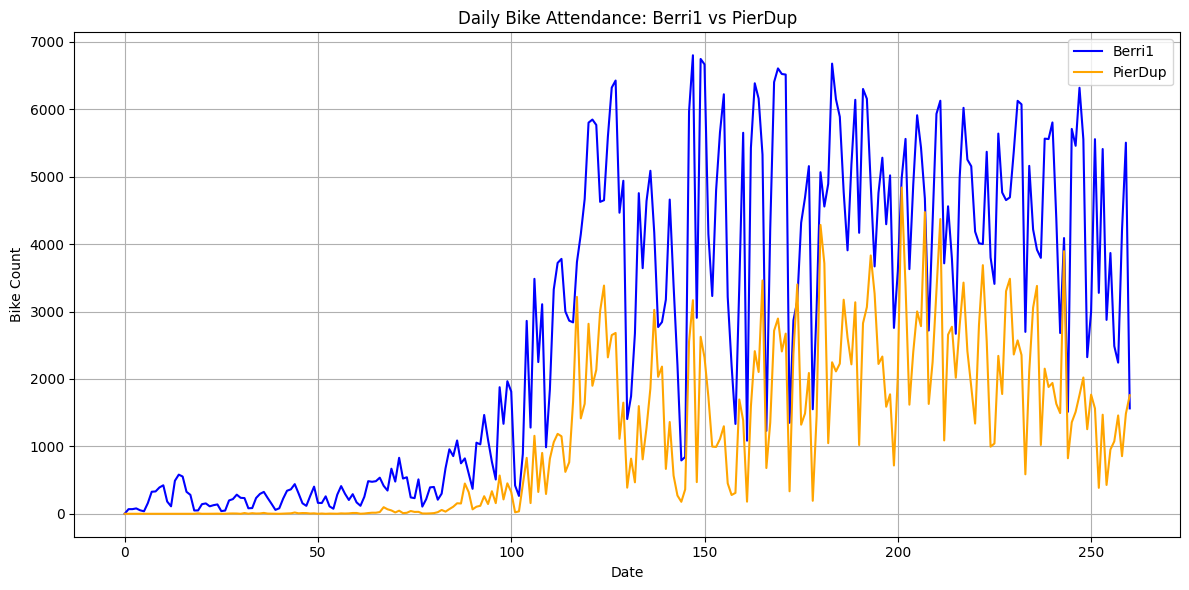

In [50]:
# Plot the daily attendance of two tracks, 'Berri1', 'PierDup'
plt.figure(figsize=(12, 6))
plt.plot(bike['Berri1'], label='Berri1', color='blue')
plt.plot(bike['PierDup'], label='PierDup', color='orange')

plt.title('Daily Bike Attendance: Berri1 vs PierDup')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
#Total no:of bikes on each track in all dates
track_total = bike.drop(columns='Date').sum(axis=0)
track_total

Berri1           716025
CSC              318905
Mais1            458731
Mais2            841498
Parc             435720
PierDup          300903
Rachel1          805035
Totem_Laurier    485145
dtype: int64

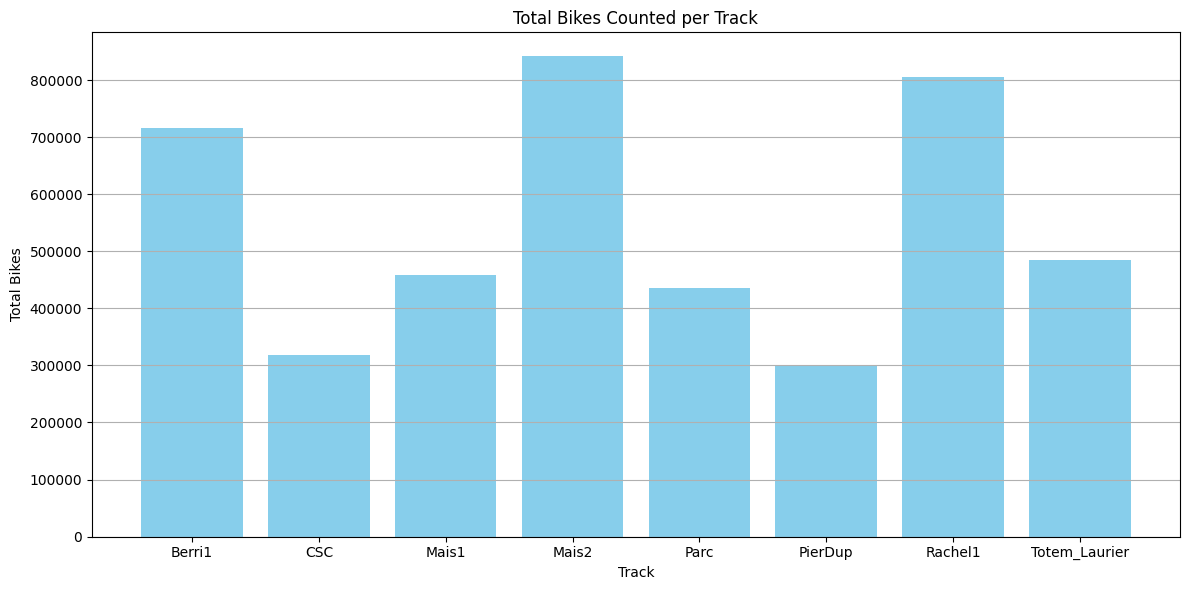

In [52]:
plt.figure(figsize=(12,6))
plt.bar(track_total.index,track_total.values,color='skyblue')
plt.xlabel('Track')
plt.ylabel('Total Bikes')
plt.title('Total Bikes Counted per Track')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [53]:
bike['Date'][10:20],type(bike['Date'][0])

(10    11/01/2013
 11    12/01/2013
 12    13/01/2013
 13    14/01/2013
 14    15/01/2013
 15    16/01/2013
 16    17/01/2013
 17    18/01/2013
 18    19/01/2013
 19    20/01/2013
 Name: Date, dtype: object,
 str)

In [54]:
bike['Date']=pd.to_datetime(bike['Date'],format="%d/%m/%Y")
type(bike['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [55]:
bike['Date'][0].day_name(),bike['Date'][0].year

('Tuesday', 2013)

In [56]:
bike['Date'].dt.day_name(),bike['Date'].dt.year

(0        Tuesday
 1      Wednesday
 2       Thursday
 3         Friday
 4       Saturday
          ...    
 256     Saturday
 257       Sunday
 258       Monday
 259      Tuesday
 260    Wednesday
 Name: Date, Length: 261, dtype: object,
 0      2013
 1      2013
 2      2013
 3      2013
 4      2013
        ... 
 256    2013
 257    2013
 258    2013
 259    2013
 260    2013
 Name: Date, Length: 261, dtype: int32)

In [57]:
bike['day']=bike['Date'].dt.day_name()

In [58]:
bike.head()

,Date,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,day
0,2013-01-01,0,0,1,0,6,0,1,0,Tuesday
1,2013-01-02,69,0,13,0,18,0,2,0,Wednesday
2,2013-01-03,69,2,21,6,22,1,0,0,Thursday
3,2013-01-04,80,0,22,4,16,0,125,0,Friday
4,2013-01-05,52,4,19,3,12,0,97,0,Saturday


In [59]:
bike.day

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
256     Saturday
257       Sunday
258       Monday
259      Tuesday
260    Wednesday
Name: day, Length: 261, dtype: object

In [60]:
bike['week_day'] = bike['Date'].dt.weekday

In [61]:
bike['week_day']
bike.head()

,Date,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,day,week_day
0,2013-01-01,0,0,1,0,6,0,1,0,Tuesday,1
1,2013-01-02,69,0,13,0,18,0,2,0,Wednesday,2
2,2013-01-03,69,2,21,6,22,1,0,0,Thursday,3
3,2013-01-04,80,0,22,4,16,0,125,0,Friday,4
4,2013-01-05,52,4,19,3,12,0,97,0,Saturday,5


In [62]:
bike['Day_type'] = ['Week_end' if day in ['Sunday', 'Saturday'] else 'Week_day' for day in bike['day']]

#bike['Day_type'] = bike['day'].apply(lambda x: 'Week_end' if x in ['Sunday', 'Saturday'] else 'Week_day')


In [63]:
bike['Day_type'].nunique()

2

In [64]:
bike.columns

Index(['Date', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc', 'PierDup', 'Rachel1',
       'Totem_Laurier', 'day', 'week_day', 'Day_type'],
      dtype='object')

In [69]:
bike['Total_bikes_per_day'] = bike.drop(columns=['Date','day','Day_type','week_day']).sum(axis=1)
bike.head()

,Date,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,day,week_day,Day_type,Total_bikes_per_day
0,2013-01-01,0,0,1,0,6,0,1,0,Tuesday,1,Week_day,16
1,2013-01-02,69,0,13,0,18,0,2,0,Wednesday,2,Week_day,204
2,2013-01-03,69,2,21,6,22,1,0,0,Thursday,3,Week_day,242
3,2013-01-04,80,0,22,4,16,0,125,0,Friday,4,Week_day,494
4,2013-01-05,52,4,19,3,12,0,97,0,Saturday,5,Week_end,374


In [66]:
bike.columns

Index(['Date', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc', 'PierDup', 'Rachel1',
       'Totem_Laurier', 'day', 'week_day', 'Day_type', 'Total_bikes_per_day'],
      dtype='object')

In [67]:
bike.Total_bikes_per_day,bike['Total_bikes_per_day'].sum(axis=0)

(0          8
 1        102
 2        121
 3        247
 4        187
        ...  
 256    16386
 257    17755
 258    26402
 259    33292
 260    19116
 Name: Total_bikes_per_day, Length: 261, dtype: int64,
 4361962)

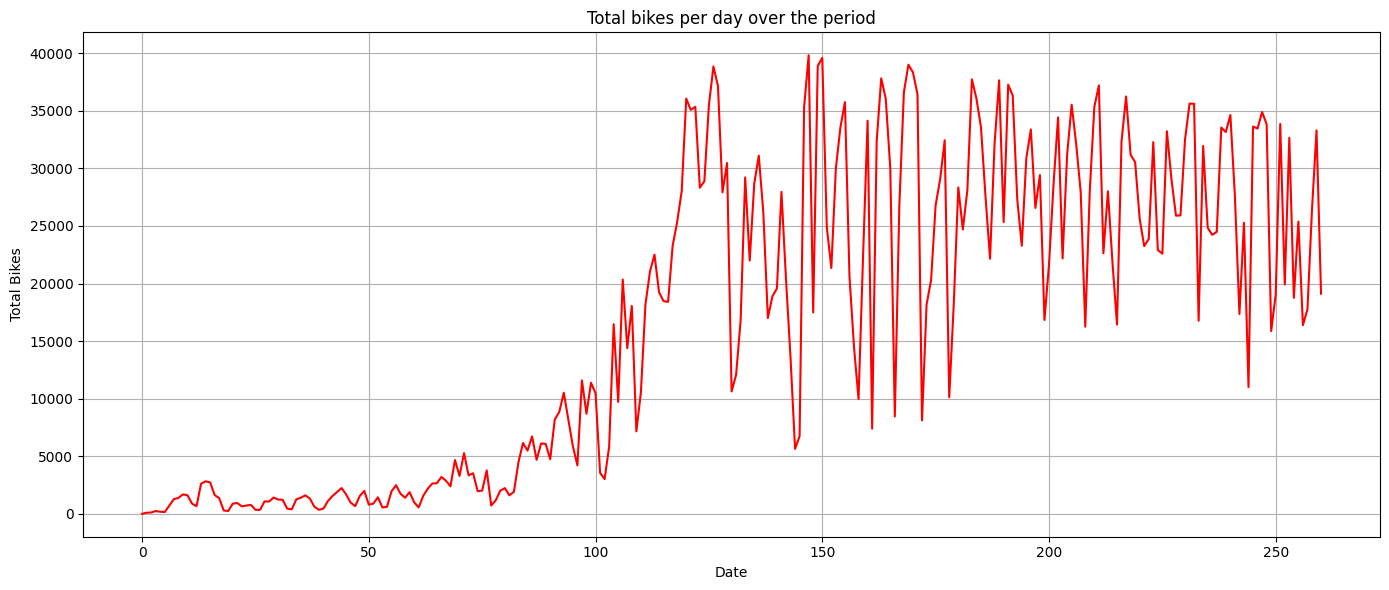

In [68]:
plt.figure(figsize=(14, 6))
plt.plot(bike['Total_bikes_per_day'],'r-')
plt.title('Total bikes per day over the period')
plt.xlabel('Date')
plt.ylabel('Total Bikes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
#Get sum of all attendance as a function of the weekday
bike.groupby(['week_day','day']).agg({'Total_bikes_per_day':'sum'})

,,Total_bikes_per_day
week_day,day,
0,Monday,662902
1,Tuesday,705161
2,Wednesday,732606
3,Thursday,690471
4,Friday,640301
5,Saturday,463944
6,Sunday,466577


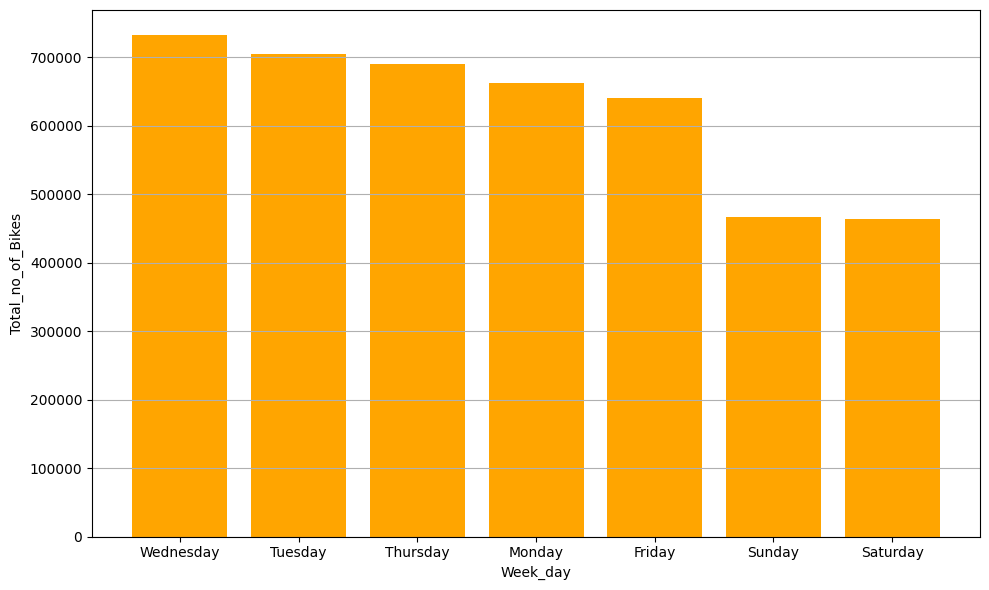

In [32]:
day_vs_total = bike.groupby('day').agg({'Total_bikes_per_day': 'sum'}).sort_values('Total_bikes_per_day',ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(day_vs_total.index, day_vs_total.Total_bikes_per_day, color="orange")
plt.xlabel("Week_day")
plt.ylabel("Total_no_of_Bikes")
plt.grid(axis="y")
plt.tight_layout()
plt.show()



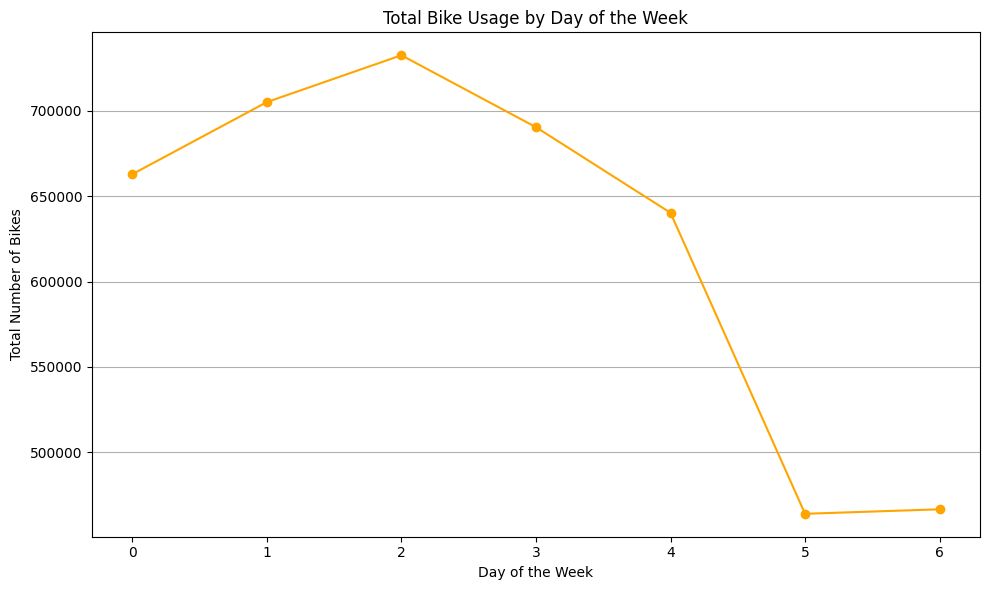

In [33]:
day_vs_total = bike.groupby('week_day').agg({'Total_bikes_per_day': 'sum'})

 

plt.figure(figsize=(10, 6))
plt.plot(day_vs_total.index, day_vs_total['Total_bikes_per_day'], marker='o', linestyle='-', color='orange')
plt.title("Total Bike Usage by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Number of Bikes")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [34]:
#Which days have the most bike traffic weekend or weekday
bike.groupby('Day_type').agg({'Total_bikes_per_day':'sum'})

,Total_bikes_per_day
Day_type,
Week_day,3431441
Week_end,930521


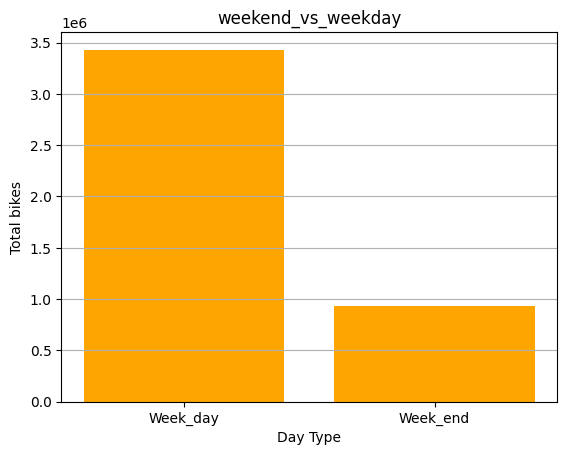

In [35]:
weekend_vs_weekday = bike.groupby('Day_type').agg({'Total_bikes_per_day':'sum'})
plt.bar(weekend_vs_weekday.index,weekend_vs_weekday.Total_bikes_per_day,color="orange")
plt.xlabel("Day Type")
plt.ylabel("Total bikes")
plt.title("weekend_vs_weekday")
plt.grid(axis="y")
plt.show()

In [5]:
path = r'code\data\titanic_train.csv'

In [6]:
titanic = pd.read_csv(path)

In [7]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.shape

(891, 11)

In [9]:
titanic.size

9801

In [10]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [11]:
titanic.nunique()

survived      2
pclass        3
name        891
sex           2
age          88
sibsp         7
parch         7
ticket      681
fare        248
cabin       147
embarked      3
dtype: int64

In [12]:
 titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
# Which gender survived more
gender_vs_survived = titanic.groupby('sex').agg({'sex': 'count', 'survived': 'sum'})
gender_vs_survived

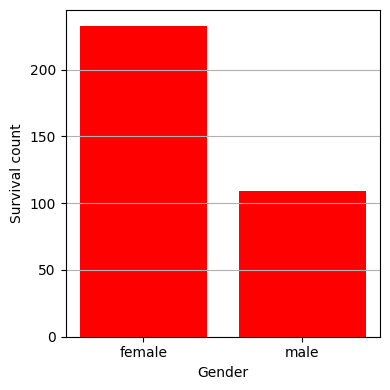

In [52]:
plt.figure(figsize=(4,4))
plt.bar(gender_vs_survived.index,gender_vs_survived.survived,color="red")
plt.xlabel('Gender')
plt.ylabel('Survival count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [53]:
titanic['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [54]:
#Does it depend on pclass?
pclass_vs_survial = titanic.groupby('pclass').agg({'survived':'sum'})
pclass_vs_survial

,survived
pclass,
1,136
2,87
3,119


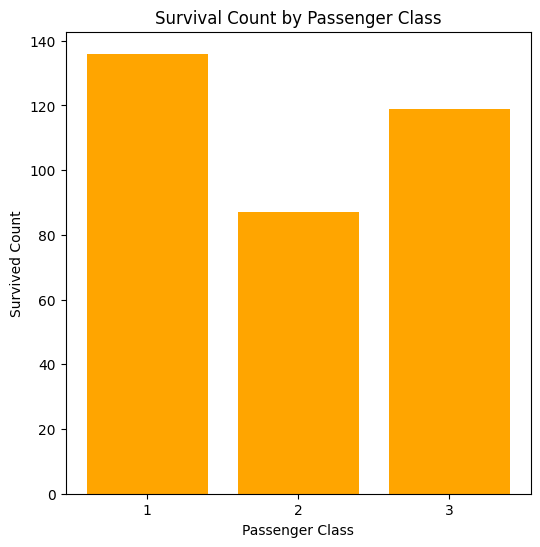

In [55]:
plt.figure(figsize=(6,6))
plt.bar(pclass_vs_survial.index,pclass_vs_survial.survived,color="orange")
plt.xticks([1, 2, 3])
plt.xlabel('Passenger Class')
plt.ylabel('Survived Count')
plt.title('Survival Count by Passenger Class')
plt.show()

In [40]:
#2. % of survival of each gender
gender_vs_survived = titanic.groupby('sex').agg({'sex': 'count', 'survived': 'sum'})
gender_vs_survived.rename(columns={'sex': 'total', 'survived': 'survived'}, inplace=True)
gender_vs_survived['%survival'] = round(gender_vs_survived['survived']/gender_vs_survived['total'],3)
gender_vs_survived

,total,survived,%survival
sex,,,
female,314,233,0.742
male,577,109,0.189


In [38]:
#% of survival of each pclass 
pclass_vs_survived = titanic.groupby(['pclass']).agg({'pclass':'sum','survived':'sum'})
pclass_vs_survived.columns = ['total','survived']
pclass_vs_survived['%surival'] = round(pclass_vs_survived['survived']/pclass_vs_survived['total'],3)
pclass_vs_survived

,total,survived,%surival
pclass,,,
1,216,136,0.630
2,368,87,0.236
3,1473,119,0.081


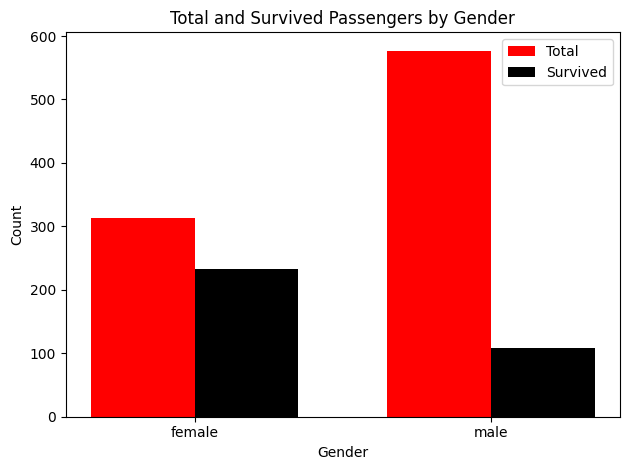

In [20]:
# gender_vs_survived - plot
labels = gender_vs_survived.index
total = gender_vs_survived['total']
survived = gender_vs_survived['survived']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, total, width, label='Total', color='red')
bars2 = ax.bar(x + width/2, survived, width, label='Survived', color='black')

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Total and Survived Passengers by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


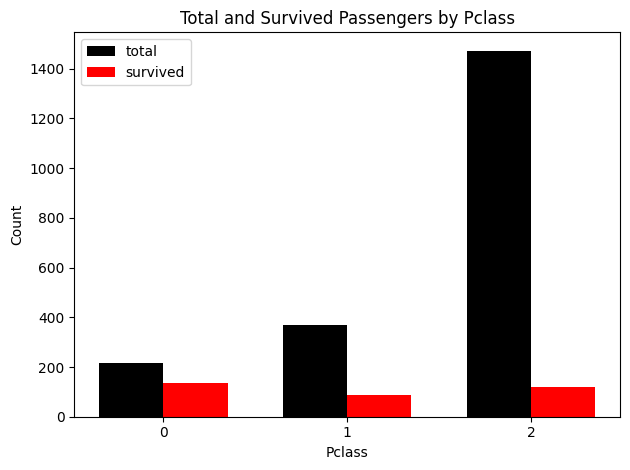

In [36]:
# pclass_vs_survived - plot
labels = pclass_vs_survived.index
total = pclass_vs_survived.total
survived = pclass_vs_survived.survived

fig,ax = plt.subplots()
width = 0.35

x = np.arange(len(labels)) #[0,1,2]
bar1 = ax.bar(x-width/2,total,width,label = 'total',color='black')
bar2 = ax.bar(x+width/2,survived,width,label='survived',color='red')
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.set_title('Total and Survived Passengers by Pclass')
ax.set_xticks(x)
ax.legend()

plt.tight_layout()
plt.show()

In [57]:
#pclass vs gender 
survivors=titanic.groupby(['pclass','sex']).agg({'survived':'sum'})
survivors

survived
pclass sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47

In [60]:
pclass_gender_vs_survived = titanic.groupby(['pclass','sex','survived']).agg({'survived':'count'})
#pclass_gender_vs_survived.columns = ['total','survived']
#pclass_gender_vs_survived['%surival'] = round(pclass_vs_survived['survived']/pclass_vs_survived['total'],3)
pclass_gender_vs_survived.columns=['total']
pclass_gender_vs_survived

total
pclass sex    survived       
1      female 0             3
              1            91
       male   0            77
              1            45
2      female 0             6
              1            70
       male   0            91
              1            17
3      female 0            72
              1            72
       male   0           300
              1            47

In [96]:
titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [97]:
titanic.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [98]:
titanic.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [115]:
titanic['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [111]:
titanic['embarked'].mode()

0    S
Name: embarked, dtype: object

In [114]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace = True)
titanic['embarked'].isnull().sum()

0

In [59]:
titanic['cabin'].value_counts()

cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [58]:
titanic['cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: cabin, dtype: object

In [9]:
path=r'code\data\federer.csv'

In [10]:
federer = pd.read_csv(path)

In [11]:
federer.head()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
federer.shape

(1179, 70)

In [13]:
federer.size

82530

In [14]:
federer.columns

Index(['year', 'tournament', 'start date', 'type', 'surface', 'draw',
       'atp points', 'atp ranking', 'tournament prize money', 'round',
       'opponent', 'ranking', 'score', 'stats link', 'tournament.1',
       'tournament round', 'time', 'winner', 'player1 name',
       'player1 nationality', 'player1 aces', 'player1 double faults',
       'player1 1st serves in', 'player1 1st serves total',
       'player1 1st serve points won', 'player1 1st serve points total',
       'player1 2nd serve points won', 'player1 2nd serve points total',
       'player1 break points won', 'player1 break points total',
       'player1 service games played', 'player1 1st serve return points won',
       'player1 1st serve return points total',
       'player1 2nd serve return points won',
       'player1 2nd serve return points total',
       'player1 break points converted won',
       'player1 break points converted total', 'player1 return games played',
       'player1 total service points won',
 

In [102]:
#How many % of matched won by our player? ('winner') - Roger Federer
total_ = federer.winner.size
Roger_df = federer.loc[federer['winner']=='Roger Federer',:]
Roger_winning = Roger_df['winner'].size
Roger_win_per = round((Roger_winning / total_)*100,3)
Roger_win_per

82.443

In [113]:
#3. Proportion of double faults wrt total points in each match 
#This number is an indicator of the player's state of mind, his level of self-confidence, 
#his willingness to take risks while serving, and other parameters.
#columns:
#'player1 double faults' and 'player1 total points total'
#Display simple stats of above 

federer[['player1 double faults','player1 total points total','player2 double faults','player2 total points total']]
federer.loc[:,['player1 name','player2 name']].nunique()


player1 name      1
player2 name    282
dtype: int64

In [116]:
proportion_df = pd.DataFrame(round(federer['player1 double faults'] / federer['player1 total points total'], 3),columns=['double_fault_proportion_roger'])
proportion_df['double_fault_proportion_others'] = pd.DataFrame(round(federer['player2 double faults'] / federer['player2 total points total'], 3))
proportion_df

,double_fault_proportion_roger,double_fault_proportion_others
0,0.019,0.010
1,0.000,0.000
2,0.020,0.027
3,0.046,0.008
4,NaN,NaN
...,...,...
1174,0.018,0.004
1175,0.000,0.035
1176,0.000,0.000
1177,0.012,0.000


In [17]:
#federer[['player1 double faults','player1 total points total']].isnull().sum()

player1 double faults         152
player1 total points total    152
dtype: int64

In [ ]:
#4. Average Win per surface
federer['surface'].unique()
federer.surface

In [91]:
federer.columns
federer_surface = federer.groupby('surface').agg({'winner':'count'})
federer_surface

,winner
surface,
Indoor: Carpet,76
Indoor: Clay,6
Indoor: Hard,226
Outdoor: Clay,249
Outdoor: Grass,140
Outdoor: Hard,482


In [96]:
Roger_df_surface =Roger_df.groupby('surface').agg({'winner':'count'})
Roger_df_surface.columns = ['roger_win']

In [100]:
ave_df = federer_surface.merge(Roger_df_surface,on='surface')
ave_df['avg_win_%_roger'] = round(ave_df['roger_win']/ave_df['winner'],3)
ave_df

,winner,roger_win,avg_win_%_roger
surface,,,
Indoor: Carpet,76,56,0.737
Indoor: Clay,6,5,0.833
Indoor: Hard,226,189,0.836
Outdoor: Clay,249,194,0.779
Outdoor: Grass,140,122,0.871
Outdoor: Hard,482,406,0.842


In [ ]:
#5. Display the proportion of double faults as a function of the tournament date, 'start date'
#Trend: display average double faults in each year 

In [129]:
federer.columns

Index(['year', 'tournament', 'start date', 'type', 'surface', 'draw',
       'atp points', 'atp ranking', 'tournament prize money', 'round',
       'opponent', 'ranking', 'score', 'stats link', 'tournament.1',
       'tournament round', 'time', 'winner', 'player1 name',
       'player1 nationality', 'player1 aces', 'player1 double faults',
       'player1 1st serves in', 'player1 1st serves total',
       'player1 1st serve points won', 'player1 1st serve points total',
       'player1 2nd serve points won', 'player1 2nd serve points total',
       'player1 break points won', 'player1 break points total',
       'player1 service games played', 'player1 1st serve return points won',
       'player1 1st serve return points total',
       'player1 2nd serve return points won',
       'player1 2nd serve return points total',
       'player1 break points converted won',
       'player1 break points converted total', 'player1 return games played',
       'player1 total service points won',
 

In [121]:
federer['start date'][2],type(federer['start date'][0])

('28.09.1998', str)

In [122]:
federer['start date'] = pd.to_datetime(federer['start date'],format = '%d.%m.%Y')

In [123]:
federer['start date'][2],type(federer['start date'][0])

(Timestamp('1998-09-28 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [124]:
federer['year'] = federer['start date'].dt.year 

In [133]:
federer['start date'].unique().size

294

In [137]:
#player 1 Roger---
proportion_per_day = federer.groupby('start date').agg({'player1 double faults':'sum','player1 total points total':'sum'})
proportion_per_day
proportion_per_day['proportion of double faults'] = round(proportion_per_day['player1 double faults'] / proportion_per_day['player1 total points total'],3)
proportion_per_day

,player1 double faults,player1 total points total,proportion of double faults
start date,,,
1998-07-06,3.0,136.0,0.022
1998-08-24,0.0,0.0,NaN
1998-09-28,9.0,384.0,0.023
1998-10-05,2.0,103.0,0.019
1999-01-25,0.0,0.0,NaN
...,...,...,...
2012-08-27,7.0,707.0,0.010
2012-09-14,0.0,0.0,NaN
2012-10-07,9.0,569.0,0.016


In [140]:
#Trend: display average double faults in each year 
proportion_per_year = federer.groupby('year').agg({'player1 double faults':'sum','player1 total points total':'sum'})
proportion_per_year
proportion_per_year['proportion of double faults'] = round(proportion_per_year['player1 double faults'] / proportion_per_year['player1 total points total'],3)
proportion_per_year

,player1 double faults,player1 total points total,proportion of double faults
year,,,
1998,14.0,623.0,0.022
1999,92.0,4024.0,0.023
2000,203.0,9531.0,0.021
2001,203.0,11666.0,0.017
2002,205.0,11816.0,0.017
2003,258.0,13361.0,0.019
2004,156.0,11483.0,0.014
2005,152.0,13644.0,0.011
2006,118.0,15491.0,0.008


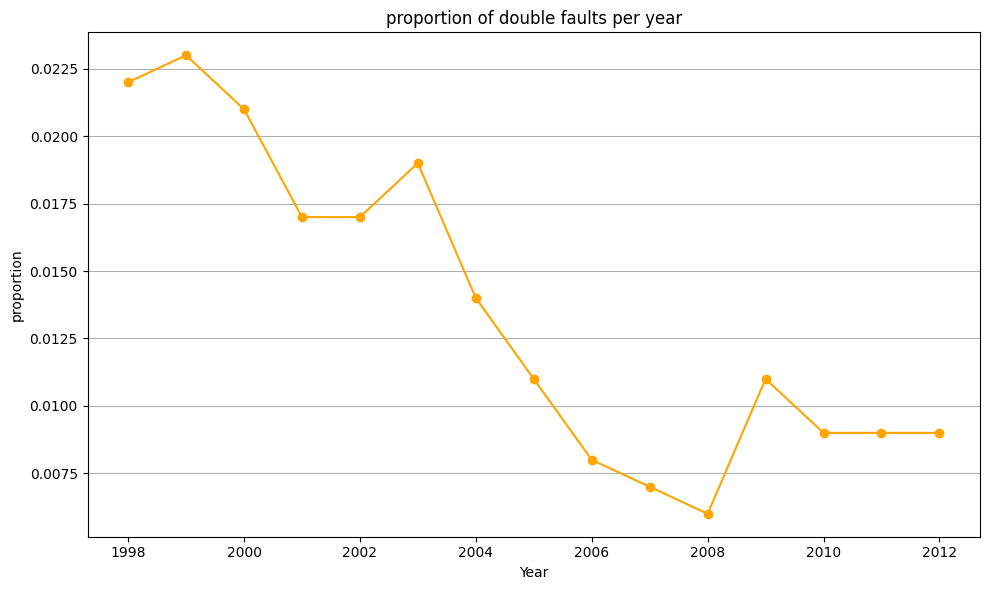

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(proportion_per_year.index, proportion_per_year['proportion of double faults'], marker='o', linestyle='-', color='orange')
plt.title("proportion of double faults per year")
plt.xlabel("Year")
plt.ylabel("proportion")
plt.grid(axis='y')
plt.tight_layout()
plt.show()